In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import pathlib
import os
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from IPython import display
%matplotlib inline

import tensorflow_datasets as tfds

In [18]:
# implement image preprocessing
def random_crop(image):
  cropped_image = tf.image.random_crop(
      image, size=[IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image

def normalize(image):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  return image

def random_jitter(image):
  # resizing to 286 x 286 x 3
  image = tf.image.resize(image, [286, 286],
                          method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  # randomly cropping to 256 x 256 x 3
  image = random_crop(image)

  # random mirroring
  image = tf.image.random_flip_left_right(image)

  return image

def preprocess_image_train(image, label):
  image = random_jitter(image)
  image = normalize(image)
  return image

def preprocess_image_test(image, label):
  image = normalize(image)
  return image

In [5]:
dataset, metadata = tfds.load('cycle_gan/vangogh2photo', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:14<00:00, 12.24s/ url]

Dl Completed...: 100%|██████████| 1/1 [02:20<00:00, 12.24s/ url]
Dl Completed...: 2 url [02:20, 80.52s/ url]
Dl Completed...: 2 url [02:20, 80.52s/ url]

Dl Completed...: 2 url [02:26, 80.52s/ url]
Extraction completed...: 100%|██████████| 2/2 [02:26<00:00, 73.49s/ file]
Dl Size...: 321 MiB [02:26,  2.18 MiB/s]
Dl Completed...: 2 url [02:26, 73.50s/ url]


Dataset cycle_gan downloaded and prepared to /Users/hugoenglund/tensorflow_datasets/cycle_gan/vangogh2photo/2.0.0. Subsequent calls will reuse this data.


In [6]:
# split data
train_vangogh, train_photo = dataset['trainA'], dataset['trainB']
test_vangogh, test_photo = dataset['testA'], dataset['testB']

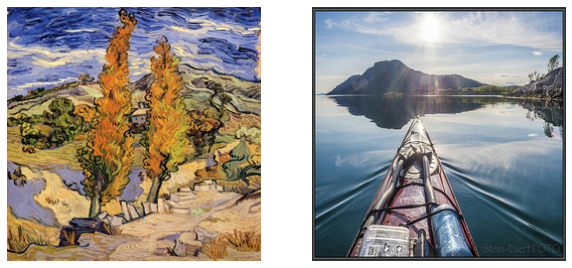

In [17]:
# plot sample images
sample_vangogh = next(iter(train_vangogh))
sample_photo = next(iter(train_photo))

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(sample_vangogh[0])
plt.axis('off')

plt.subplot(122)
plt.imshow(sample_photo[0])
plt.axis('off')
plt.show()

In [19]:
BUFFER_SIZE = 1000
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256
AUTOTUNE = tf.data.AUTOTUNE

In [20]:
# preprocess images
train_vangogh = train_vangogh.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

train_photo = train_photo.cache().map(
    preprocess_image_train, num_parallel_calls=AUTOTUNE).shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_vangogh = test_vangogh.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

test_photo = test_photo.map(
    preprocess_image_test, num_parallel_calls=AUTOTUNE).cache().shuffle(
    BUFFER_SIZE).batch(BATCH_SIZE)

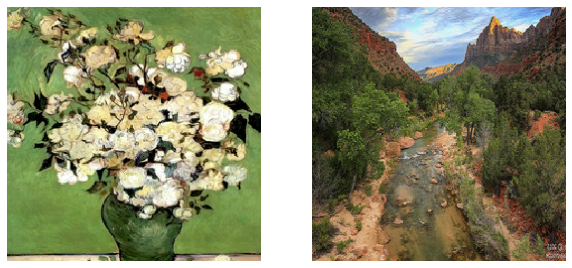

In [25]:
# plot sample images after preprocessing
sample_vangogh = next(iter(train_vangogh))
sample_photo = next(iter(train_photo))

plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(sample_vangogh[0] * .5 + .5)
plt.axis('off')

plt.subplot(122)
plt.imshow(sample_photo[0] * .5 + .5)
plt.axis('off')
plt.show()